<a href="https://colab.research.google.com/github/Opeyemiiii/opeyemi_python_and_Machine-learning_project_portfolio/blob/main/Big_mart_sales_prediction_with_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing The Dependencies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score


In [ ]:
big_mart_sales = pd.read_csv('Energy_consumption_rawdata.csv')

FileNotFoundError: ignored

In [ ]:
big_mart_sales.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,meter,meter_reading
0,13,1124,Lodging/residential,153299,NaN,NaN,2016-07-26 05:00:00,25.6,0.0,17.8,0.0,1016.6,210.0,1.5,0,236.9860
1,3,363,Education,69300,2017.0,NaN,2016-09-14 03:00:00,24.4,6.0,18.9,0.0,1020.3,170.0,4.6,0,4.9000
2,1,143,Office,40085,NaN,4.0,2016-10-05 01:00:00,13.5,0.0,10.1,NaN,1030.0,90.0,5.7,0,37.9090
3,2,169,Education,179559,2006.0,NaN,2016-03-10 23:00:00,28.9,2.0,-7.8,0.0,1012.2,0.0,0.0,0,488.9100
4,13,1211,Office,94988,NaN,NaN,2016-10-17 10:00:00,18.9,NaN,16.7,0.0,998.5,250.0,2.1,1,0.6664


In [ ]:
big_mart_sales.shape

(1048575, 16)

In [ ]:
big_mart_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Checking for number of missing values

In [ ]:
big_mart_sales.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
big_mart_sales['Item_Weight'].mean()

12.857645184135976

Trying to fill the missing value for ITEM WEIGHT with the mean value

In [ ]:
big_mart_sales['Item_Weight'].fillna(big_mart_sales['Item_Weight'].mean(), inplace = True)

In [ ]:
big_mart_sales.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
big_mart_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Using the mode method to fill the na in outlet_size column

In [ ]:
#mode_of_outlet_size = big_mart_sales.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc= (lambda x: x.mode()[0]))
#mode_of_outlet_size

In [ ]:
#missing_value = big_mart_sales['Outlet_Size'].isnull()
#missing_value

In [ ]:
#big_mart_sales.loc[missing_value, 'Outlet_Size'] = big_mart_sales.loc[missing_value, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size)

I am tired of this process let us drop the NA values abeg

In [ ]:
big_mart_sales = big_mart_sales.dropna()

In [ ]:
big_mart_sales.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
big_mart_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6113 non-null   object 
 1   Item_Weight                6113 non-null   float64
 2   Item_Fat_Content           6113 non-null   object 
 3   Item_Visibility            6113 non-null   float64
 4   Item_Type                  6113 non-null   object 
 5   Item_MRP                   6113 non-null   float64
 6   Outlet_Identifier          6113 non-null   object 
 7   Outlet_Establishment_Year  6113 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6113 non-null   object 
 10  Outlet_Type                6113 non-null   object 
 11  Item_Outlet_Sales          6113 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 620.9+ KB


In [ ]:
big_mart_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


Data Analytics

In [ ]:
big_mart_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000
mean,12.888856,0.064505,141.256859,1995.794373,2322.688445
std,4.073798,0.050092,62.229701,8.842615,1741.592093
min,4.555000,0.000000,31.290000,1985.000000,33.955800
25%,9.800000,0.026681,94.012000,1987.000000,974.731200
50%,12.857645,0.052811,143.178600,1997.000000,1928.156800
75%,15.700000,0.092834,185.892400,2004.000000,3271.075400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Distribution Plot on Numerical Features

Numerical Features:
Item Weight
Item Visibility
Item MRP
Outlet Establishment Year
Item Outlet sales

<Figure size 432x432 with 0 Axes>

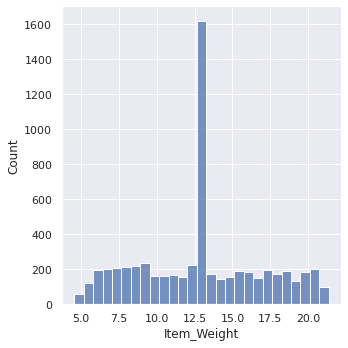

In [ ]:
plt.figure(figsize = (6,6))
sns.displot(big_mart_sales['Item_Weight'])
plt.show()

<Figure size 432x432 with 0 Axes>

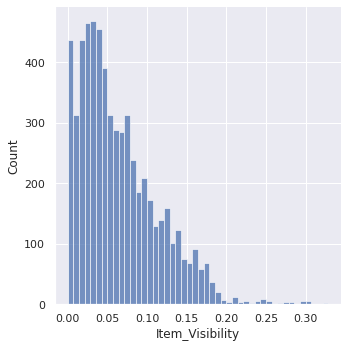

In [ ]:
plt.figure(figsize = (6,6))
sns.displot(big_mart_sales['Item_Visibility'])
plt.show()

<Figure size 432x432 with 0 Axes>

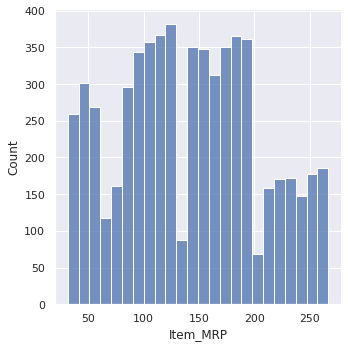

In [ ]:
plt.figure(figsize = (6,6))
sns.displot(big_mart_sales['Item_MRP'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


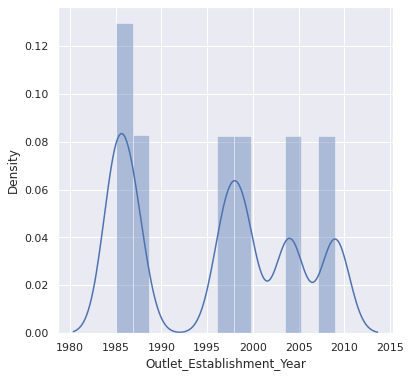

In [ ]:
plt.figure(figsize = (6,6))
sns.distplot(big_mart_sales['Outlet_Establishment_Year'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


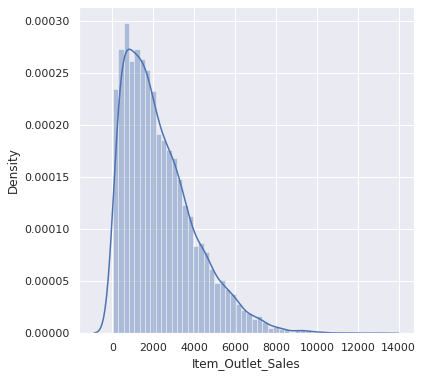

In [ ]:
plt.figure(figsize = (6,6))
sns.distplot(big_mart_sales['Item_Outlet_Sales'])
plt.show()

Categorical Features

In [ ]:
big_mart_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


Categorical Features:
Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type

In [ ]:
print(big_mart_sales['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'reg' 'LF']


In [ ]:
big_mart_sales.replace({'Item_Fat_Content':{'low fat' : 'Low Fat', 'LF':'Low Fat', 'reg': 'Regular'}}, inplace = True)

In [ ]:
correlation = big_mart_sales.corr()
correlation

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.008526,0.029214,-0.004779,0.008007
Item_Visibility,-0.008526,1.000000,-0.000651,-0.087452,-0.105854
Item_MRP,0.029214,-0.000651,1.000000,0.011632,0.588939
Outlet_Establishment_Year,-0.004779,-0.087452,0.011632,1.000000,-0.057850
Item_Outlet_Sales,0.008007,-0.105854,0.588939,-0.057850,1.000000


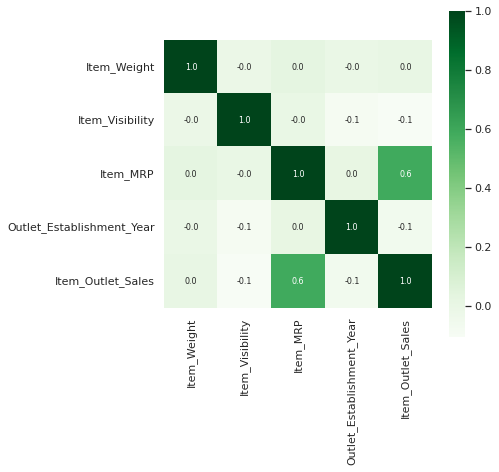

In [ ]:
plt.figure(figsize = (6,6))
sns.heatmap(correlation, cbar = True, square= True, cmap = 'Greens', fmt = '.1f', annot = True, annot_kws = {'size' : 8})

In [ ]:
print(big_mart_sales['Item_Fat_Content'].value_counts())

Low Fat    3955
Regular    2158
Name: Item_Fat_Content, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


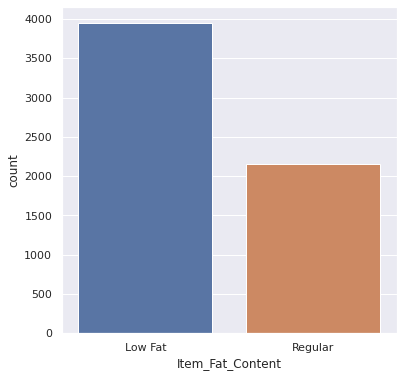

In [ ]:
sns.set(style = 'darkgrid')
plt.figure(figsize=(6,6))
sns.countplot(big_mart_sales['Item_Fat_Content'])
plt.show()

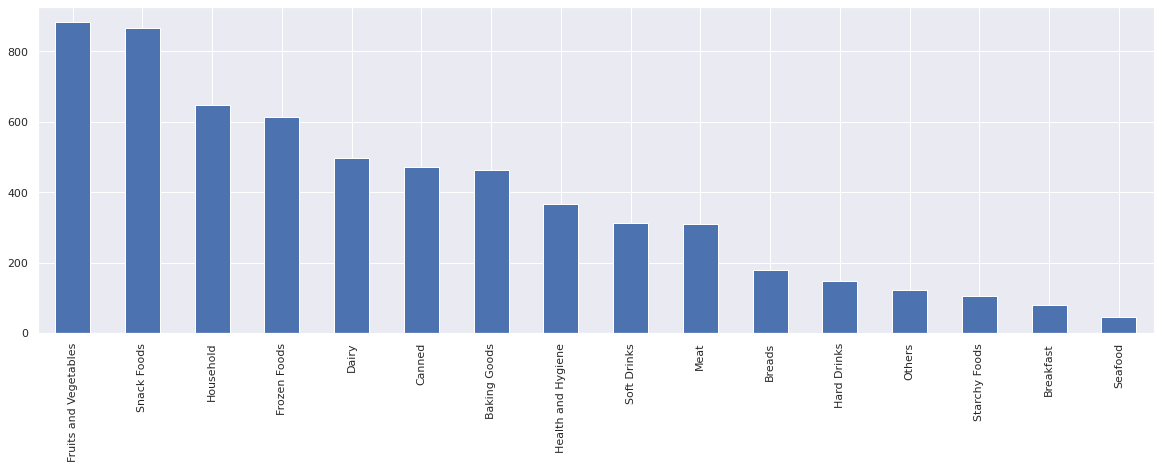

In [ ]:

plt.figure(figsize=(20,6))
big_mart_sales['Item_Type'].value_counts().plot(kind="bar")
plt.show()

In [ ]:
big_mart_sales['Item_Type'].value_counts()

Fruits and Vegetables    883
Snack Foods              868
Household                649
Frozen Foods             615
Dairy                    496
Canned                   471
Baking Goods             463
Health and Hygiene       367
Soft Drinks              312
Meat                     309
Breads                   179
Hard Drinks              148
Others                   123
Starchy Foods            105
Breakfast                 79
Seafood                   46
Name: Item_Type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


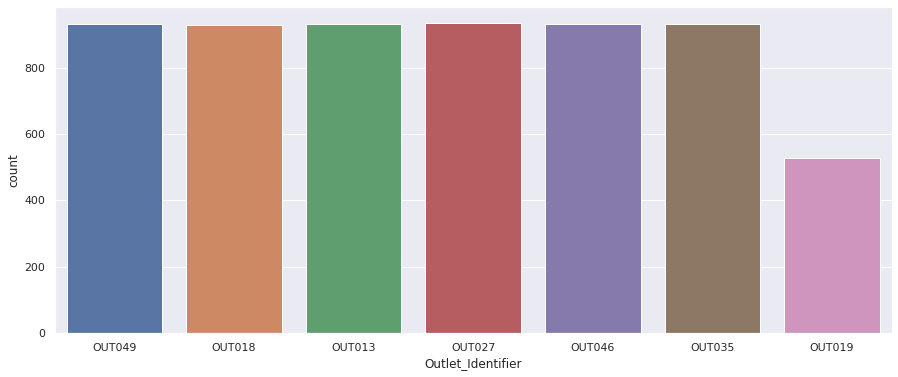

In [ ]:
plt.figure(figsize = (15,6))
sns.countplot(big_mart_sales['Outlet_Identifier'])
plt.show()

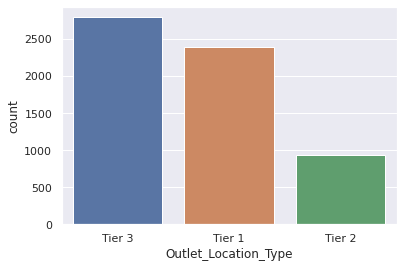

In [ ]:
sns.set(style='darkgrid')


sns.countplot(x = 'Outlet_Location_Type',
              data = big_mart_sales,
              order = big_mart_sales['Outlet_Location_Type'].value_counts().index)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


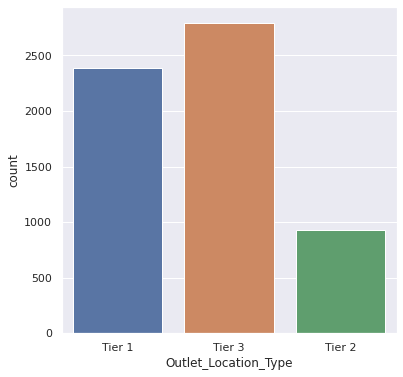

In [ ]:
plt.figure(figsize = (6,6))
sns.countplot(big_mart_sales['Outlet_Location_Type'])
plt.show()

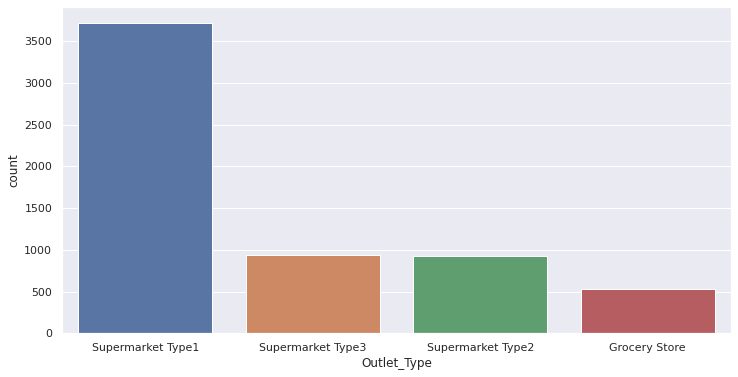

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Outlet_Type',
              data = big_mart_sales,
              order = big_mart_sales['Outlet_Type'].value_counts().index)

Data Preprocessing

Label Encoding

In [ ]:
encoder = LabelEncoder()

In [ ]:
big_mart_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [ ]:
big_mart_sales['Item_Identifier'] = encoder.fit_transform(big_mart_sales['Item_Identifier'])
big_mart_sales['Item_Fat_Content'] = encoder.fit_transform(big_mart_sales['Item_Fat_Content'])
big_mart_sales['Item_Type'] = encoder.fit_transform(big_mart_sales['Item_Type'])
big_mart_sales['Outlet_Identifier'] = encoder.fit_transform(big_mart_sales['Outlet_Identifier'])
big_mart_sales['Outlet_Size'] = encoder.fit_transform(big_mart_sales['Outlet_Size'])
big_mart_sales['Outlet_Location_Type'] = encoder.fit_transform(big_mart_sales['Outlet_Location_Type'])
big_mart_sales['Outlet_Type'] = encoder.fit_transform(big_mart_sales['Outlet_Type'])



In [ ]:
big_mart_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,155,9.300,0,0.016047,4,249.8092,6,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,1,2009,1,2,2,443.4228
2,661,17.500,0,0.016760,10,141.6180,6,1999,1,0,1,2097.2700
4,1294,8.930,0,0.000000,9,53.8614,0,1987,0,2,1,994.7052
5,757,10.395,1,0.000000,0,51.4008,1,2009,1,2,2,556.6088


Machine Learning Aspect

In [ ]:
x = big_mart_sales.drop(columns = ['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier', 'Outlet_Location_Type', 'Item_Fat_Content'], axis = 1)
y = big_mart_sales['Item_Outlet_Sales']

In [ ]:
print(x.shape, y.shape)

(6113, 7) (6113,)


Let split to train and test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

XGBoost Regressor

In [ ]:
regressor = XGBRegressor()

In [ ]:
model = regressor.fit(x_train, y_train)

[11:10:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
regressor

XGBRegressor()

In [ ]:
evaluation = regressor.predict(x_train)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(evaluation, y_train)

0.34666779706676965

In [ ]:
evaluation2 = regressor.predict(x_test)

In [ ]:
r2_score(evaluation2, y_test)

0.3326757825638229

Very Bad Model The new project in the coming future is on how to optimize it or use a new model entirely to optimize it

Trying To Optimize the accuracy with a new model

In [ ]:
#from sklearn.ensemble import RandomForestRegressor

In [ ]:
#scaler = StandardScaler()

In [ ]:
#x_train = scaler.fit_transform(x_train)

In [ ]:
#x_train

In [ ]:
Regressor = RandomForestRegressor(n_estimators = 100)

Training the model with random forest regressor

In [ ]:
Regressor.fit(x_train, y_train)

RandomForestRegressor()

Evaluating the model with random regressor

In [ ]:
train_predict = Regressor.predict(x_train)
train_predict

array([2758.882118, 2054.771986, 1232.309246, ..., 4385.371596,
       2301.983526, 3097.294942])

Importing the module metrics to evaluate the variance between predicted value and actual value

In [ ]:
from sklearn import metrics

In [ ]:
error_score = metrics.r2_score(train_predict, y_train)
error_score

0.9145121592133395

In [ ]:
absolute_error = metrics.mean_absolute_error(train_predict, y_train)
absolute_error

310.1829230617587

In [ ]:
test_predict = Regressor.predict(x_test)
test_predict

array([3973.421162, 3370.31289 , 2392.878542, ..., 1007.774854,
        350.051008, 2317.157108])

In [ ]:
metrics.r2_score(test_predict, y_test)

0.3019779419704095

In [ ]:
x_test['outletsales_original'] = y_test
x_test

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,outletsales_original
201,5.260000,0.041764,0,161.8868,2004,2,1,3275.7360
2457,12.100000,0.114874,0,221.4114,1997,2,1,5099.3622
8433,11.800000,0.057411,10,149.5366,2004,2,1,1813.6392
1575,12.857645,0.245543,12,172.2764,1985,2,0,171.7764
1714,6.780000,0.066725,6,187.7240,1999,1,1,1491.3920
...,...,...,...,...,...,...,...,...
5981,8.050000,0.164680,4,112.1518,1997,2,1,1252.3698
4614,15.100000,0.106097,6,43.2796,2009,1,2,123.8388
6968,9.800000,0.056340,1,84.2908,1987,0,1,755.0172
6622,12.857645,0.305305,6,116.6834,1985,2,0,460.7336


In [ ]:
x_test['outletsales_predict'] = test_predict
x_test.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,outletsales_original,outletsales_predict
201,5.260000,0.041764,0,161.8868,2004,2,1,3275.7360,3973.421162
2457,12.100000,0.114874,0,221.4114,1997,2,1,5099.3622,3370.312890
8433,11.800000,0.057411,10,149.5366,2004,2,1,1813.6392,2392.878542
1575,12.857645,0.245543,12,172.2764,1985,2,0,171.7764,213.508744
1714,6.780000,0.066725,6,187.7240,1999,1,1,1491.3920,3782.622856


In [ ]:
x_test.tail()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,outletsales_original,outletsales_predict
5981,8.050000,0.164680,4,112.1518,1997,2,1,1252.3698,1480.253166
4614,15.100000,0.106097,6,43.2796,2009,1,2,123.8388,506.853566
6968,9.800000,0.056340,1,84.2908,1987,0,1,755.0172,1007.774854
6622,12.857645,0.305305,6,116.6834,1985,2,0,460.7336,350.051008
6675,5.150000,0.061126,10,122.5388,1987,0,1,371.5164,2317.157108
